<a href="https://colab.research.google.com/github/kimheeseo/LDPC_study/blob/main/LSTMstudy_20220302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **출처 : https://limitsinx.tistory.com/65**

In [196]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
#from sklearn.preprocessing import MinMaxScaler

#matplotlib.pyplot : a state-based interface to matplotlib.
#It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

In [197]:
def MinMaxScaler(data):#저자가 작성한 코드 MinMaxScaler1
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

#noise term prevents the zero division(x/0을 방지하기 위해서)
#개인적으로 지난 학기에 프로젝트를 할 때, minmax를 할 때 "from sklearn.preprocessing import MinMaxScaler"를 통해
#진행했던 것으로 기억하는 데, 저자는 MinMaxScaler function을 따로 설정하여서, 진행하였습니다.

In [198]:
seq_length=7
data_dim=5
output_dim=1
learning_rate=0.01
iterations=500

In [199]:
xy=np.loadtxt('stock_prediction.txt',delimiter=',')
xy #아래의 사진을 보면, "delimiter=','"가 없는 것을 볼 수 있는데, txt파일을 그냥 loadtxt로만 불러오면, 주가 데이터를
#txt파일에서 읽을 수 없고, '828.659973, 833.450012, 828.349976, 1247700, 831.659973'가 하나의 문자열로 되기에, ",(쉼표)"를 기준으로 잘라준다.(구분)
#그렇게 되면, 아래와 같이 데이터를 잘 불러오는 것을 알 수 있다.

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [226]:
xy.shape

(732, 5)

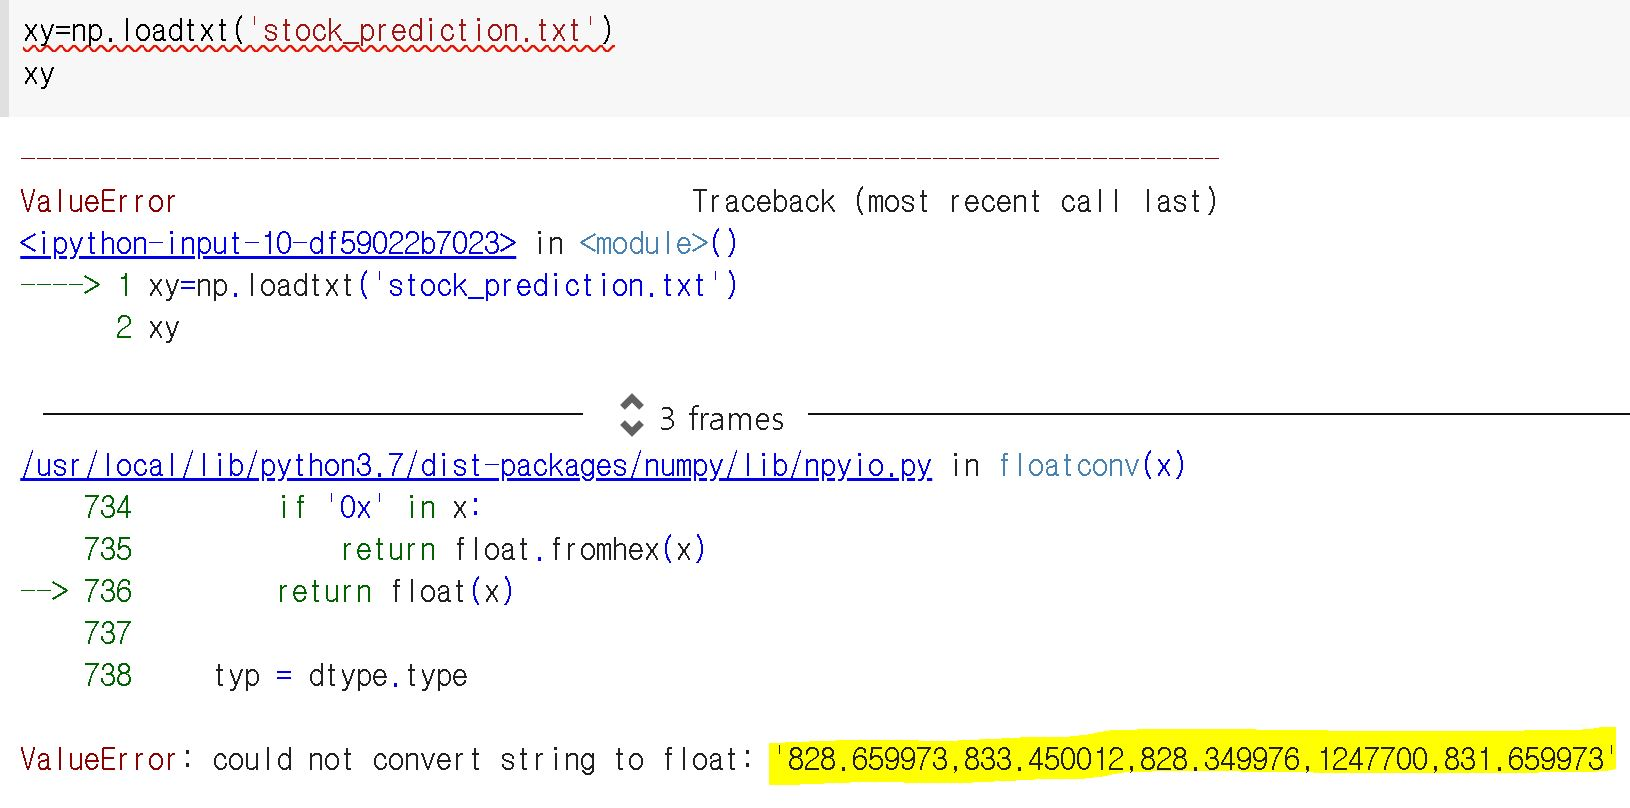

In [200]:
xy=xy[::-1] #reverse order
xy#다음은 아래와 같이 568의 값이 먼저 나오는 reverse를 한 값인데, 코드를 보면서 분석을 하고 있기에, 향후 어떻게 될지는 모르지만,
#주가는 우상향하는 것이 보통이기에, 주식이 가격이 낮은 500가 먼저 나오고, 나중에 800이 나오도록 설정하기 위해서 reverse한 것 같습니다.

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [201]:
#train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]
#보통 train과 test를 할 데이터를 7:3로 구분한다.

In [202]:
print('train_set값:\n',train_set)
print('test_set값:\n',test_set)

train_set값:
 [[5.68002570e+02 5.68002570e+02 5.52922516e+02 1.31000000e+04
  5.58462551e+02]
 [5.61202549e+02 5.66432590e+02 5.58672539e+02 4.12000000e+04
  5.59992565e+02]
 [5.66892592e+02 5.67002574e+02 5.56932537e+02 1.08000000e+04
  5.56972503e+02]
 ...
 [7.38000000e+02 7.42799988e+02 7.35369995e+02 1.13230000e+06
  7.37799988e+02]
 [7.35770020e+02 7.46239990e+02 7.35559998e+02 1.05370000e+06
  7.45690002e+02]
 [7.45369995e+02 7.47000000e+02 7.36280029e+02 1.45320000e+06
  7.40280029e+02]]
test_set값:
 [[7.50099976e+02 7.57880005e+02 7.48739990e+02 1.78240000e+06
  7.50530029e+02]
 [7.49250000e+02 7.50849976e+02 7.40940002e+02 1.71880000e+06
  7.44950012e+02]
 [7.38599976e+02 7.50340027e+02 7.37000000e+02 1.57670000e+06
  7.49909973e+02]
 ...
 [8.19929993e+02 8.24400024e+02 8.18979980e+02 1.28170000e+06
  8.24159973e+02]
 [8.23020020e+02 8.28070007e+02 8.21655029e+02 1.59780000e+06
  8.28070007e+02]
 [8.28659973e+02 8.33450012e+02 8.28349976e+02 1.24770000e+06
  8.31659973e+02]]


In [203]:
#scale each
train_set = MinMaxScaler(train_set)

test_set = MinMaxScaler(test_set)

print('train_set값:\n',train_set)
print('test_set값:\n',test_set)
#위 아래의 결과값을 통해, (0~1)의 값으로 MinMaxScaler 된 것을 확인할 수 있다.

train_set값:
 [[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 ...
 [8.39570954e-01 8.39838972e-01 8.87125813e-01 1.00779780e-01
  8.63403284e-01]
 [8.31877329e-01 8.51543969e-01 8.87806004e-01 9.37348750e-02
  8.91180354e-01]
 [8.64998078e-01 8.54129989e-01 8.90383639e-01 1.29541992e-01
  8.72134355e-01]]
test_set값:
 [[0.47419206 0.50445037 0.51770809 0.22296353 0.49142842]
 [0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 ...
 [0.89281215 0.89655181 0.94323484 0.12965206 0.93124657]
 [0.91133638 0.91818448 0.95944078 0.1885611  0.95460261]
 [0.94514702 0.94989685 1.         0.12331575 0.97604677]]


In [204]:
print('train_set.shape:\n',train_set.shape)
print('test_set.shape:\n',test_set.shape) 

#우선 저자의 train, test의 data들의 크기는 보았더니 (512,5), (227,5)로 우선 7:3으로 잘 나뉜 것은 확인할 수 있지만,
#5가 신경쓰입니다. 왜냐하면 제가 진행했던 주가 데이터 분석의 경우, 아래의 사진의 1번째처럼 yahoo finance로 구한 값인데,
#csv파일로 데이터값을 얻을 수 있고, open, high, low, close, adj close, volume과 data의 값을 얻을 수 있습니다.
#그러나 2번째 사진은 저자가 코드와 함께 올린 data값 인데, 의도적으로 데이터 값을 한 줄에 5개의 값을 나오도록 수정한 것 같고,
#python과 pandas를 활용해야,진정한 데이터 분석하는 것이라고 생각하는데, 그 점이 없어 아쉬운 것 같습니다. 물론, 저자가 공부하면서 작성한 것인지,
#기초적인 수준의 프로젝트를 진행한 것인지는 알 수 없지만, 그 점이 아쉬운 것 같습니다. pandas로 원하는 low값이나 close 값만을 추출해서 데이터값을
#분석한다거나, 거래량 등을 통해, 주가와의 상관관계 등을 분석하였다면 더욱 좋지 않았을까? 생각했습니다.

train_set.shape:
 (512, 5)
test_set.shape:
 (227, 5)


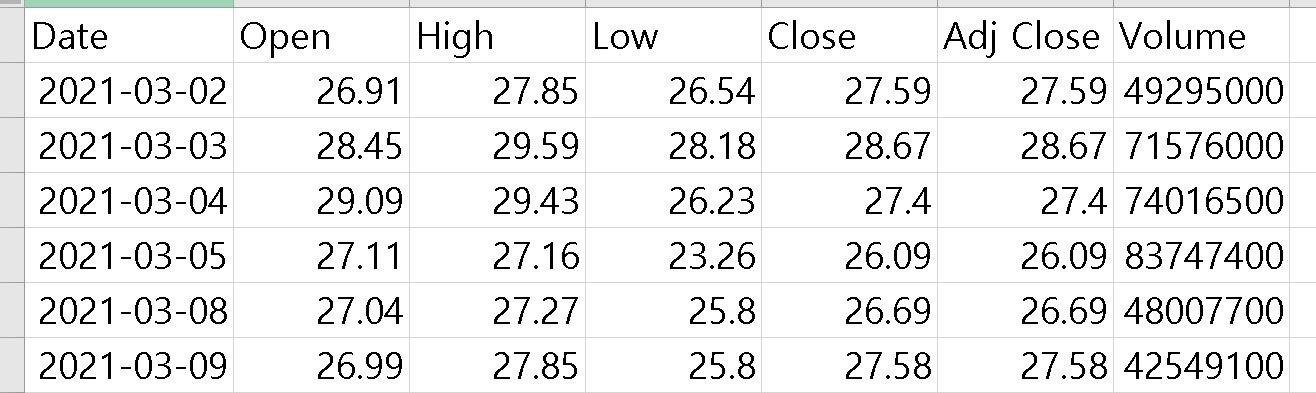

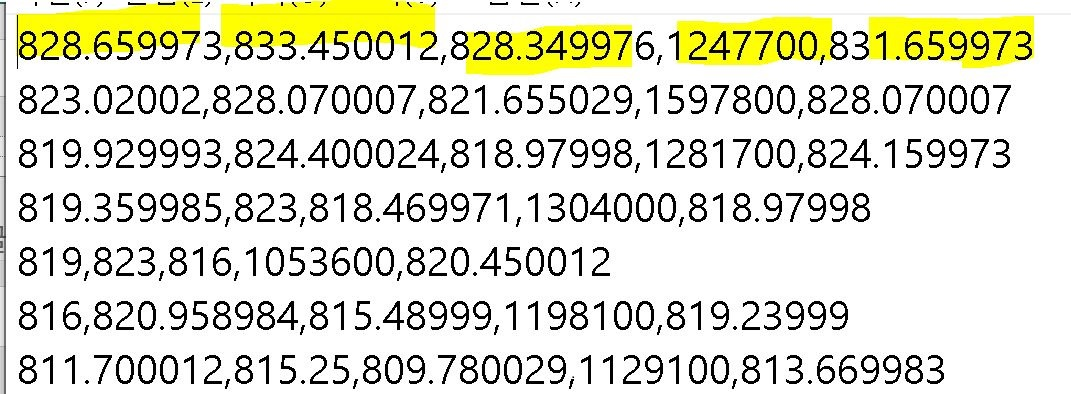

In [214]:
# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []

    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)
#build_dataset을 통해, time_series에는 train_set과 test_set을 집어 넣고, seq_length에는 7의 값을 넣어서 결과값을 출력하였습니다.
#"y = time_series[i + seq_length, [-1]]"에서 [-1]은 마지막에 값을 입력하는 것으로, 아래의 값에서 "0.14877846"은 1번째의
#[0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]] -> [0.14877846]와 같이 표현이 되는 데, 이때 "0.14877846"은 
#다음에 for 진행한 것인, [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]]에 마지막의 값이 입력된 것을 확인할 수 있다.

In [215]:
trainX, trainY = build_dataset(train_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

In [216]:
testX, testY = build_dataset(test_set, seq_length)

[[0.47419206 0.50445037 0.51770809 0.22296353 0.49142842]
 [0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.10180958 0.41538731]
 [0.3882862  0.43583844 0.43786128 0.08716152 0.4625172 ]
 [0.44583656 0.44031831 0.44222336 0.16161315 0.43020148]] -> [0.42345156]
[[0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.10180958 0.41538731]
 [0.3882862  0.43583844 0.43786128 0.08716152 0.4625172 ]
 [0.44583656 0.44031831 0.44222336 0.16161315 0.43020148]
 [0.43744363 0.43118193 0.43780064 0.13134796 0.42345156]] -> [0.40523252]
[[0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 [0.47395239 0.47450627 0.47948097 0.10216366 0.46012771]
 [0.40165458 0.41556139 0.43671021 0.1

In [217]:
print('trainX.shape값',trainX.shape)
print('trainY.shape값',trainY.shape)
print('testX.shape값',testX.shape)
print('testY.shpae값',testY.shape)

trainX.shape값 (505, 7, 5)
trainY.shape값 (505, 1)
testX.shape값 (220, 7, 5)
testY.shpae값 (220, 1)


In [219]:
tf.model = tf.keras.Sequential();

tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))

tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))

tf.model.summary()
#model을 요약(summary)해서 shape등의 정보를 볼 수 있다.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [220]:
tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))

tf.model.fit(trainX, trainY, epochs=iterations)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 2s 4ms/step - loss: 0.1444
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0228
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 10/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 11/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 12/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 13/500
16/16 [=============================

In [ ]:
# Test step
test_predict = tf.model.predict(testX)
#testX값을 넣어서 결과값을 예측한다.

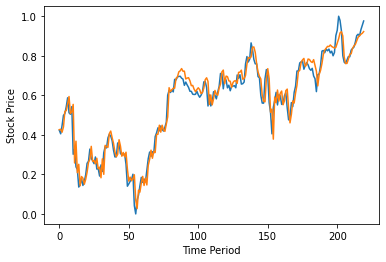

In [221]:
# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [225]:
print('test_predict값',test_predict[0:10])
print('testY값',testY[0:10])
print('testY.shape값',testY.shape)
#성능평가를 위해서 그래프와 test_predict값과 실제값의 성능을 비교하였습니다.

test_predict값 [[0.4262492 ]
 [0.42815122]
 [0.41346374]
 [0.44017014]
 [0.51790446]
 [0.52284956]
 [0.5565361 ]
 [0.5938132 ]
 [0.50731885]
 [0.5162003 ]]
testY값 [[0.42345156]
 [0.40523252]
 [0.44698661]
 [0.49853637]
 [0.50737719]
 [0.54202261]
 [0.58747978]
 [0.51173763]
 [0.50421114]
 [0.54285897]]
testY.shape값 (220, 1)


In [ ]:
#trainX.shape값 (505, 7, 5)
#train_set.shape: (512, 5) => trainY.shape값 (505, 1)
#testX.shape값 (220, 7, 5)
#test_set.shape:(227, 5) => testY.shpae값 (220, 1)

#아래의 그림처럼 입력값이 7*5의 matrix이기에, train_set.shape값이 (512,5)에서 -7이 된 (505,1)인 trainY가 되는 것을 알 수 있고,
#이때 1이 되는 이유는 trainY값이 원하는 값인데, 그 값은 1개이다. 즉, -> 뒤에 있는 값이 하나인 것을 통해 확인할 수 있다.

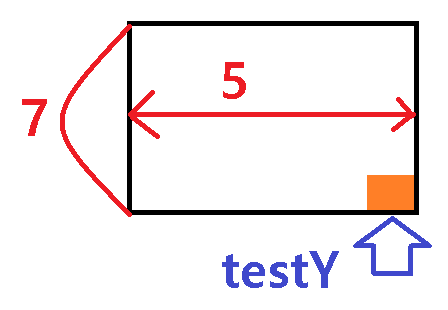

In [228]:
trainX[1] #trainX.shape값 (505, 7, 5)
#아래의 경우 (7*5)를 나타내고 있고, 우선 (7*5)가 아래로 505번 내려간것이고,
#505가 되는 이유는 원래 512인데, (7*5)에서 7개의 데이터를 모이기 전에는 아래로 움직이지 않기 때문에, 512-7=505가 된 것이다.

array([[2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03,
        2.37426028e-01],
       [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04,
        2.26793794e-01],
       [2.21013495e-01, 2.46602231e-01, 2.54710584e-01, 0.00000000e+00,
        2.62668239e-01],
       [3.63433786e-01, 3.70389871e-01, 2.67168847e-01, 1.24764722e-02,
        2.62105010e-01],
       [2.59447633e-01, 3.10673724e-01, 2.74113889e-01, 4.56323384e-01,
        2.71751265e-01],
       [2.76008150e-01, 2.78314566e-01, 1.98470380e-01, 5.70171193e-01,
        1.78104644e-01],
       [1.59015228e-01, 1.78651664e-01, 1.41728657e-01, 3.93806579e-01,
        1.60537160e-01]])

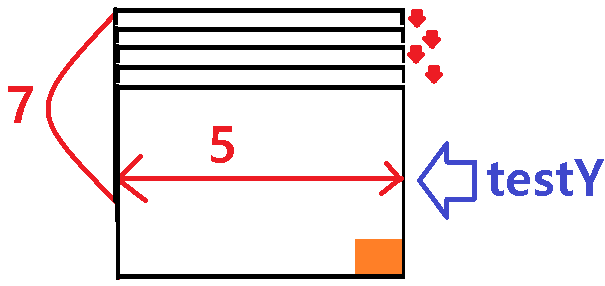